In [199]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from torch.utils.data import Dataset, DataLoader

import torch
import torch.nn as nn
from torch.autograd import Variable
import datetime
import torch.optim as optim
from torch.nn.parameter import Parameter


In [254]:
news = pd.read_excel('raw_data.xls', usecols=['comments', 'date', 'score'])
news = news.groupby('date')['score', 'comments'].sum()
news = news.pct_change()
news = news[1:]
#to numpy
score = news['score']
comments = news['comments']
score = score.as_matrix()
comments = comments.as_matrix()

#Convert to torch variable
score = torch.from_numpy(score)
comments = torch.from_numpy(comments)
#split into test and train
N = len(score)
score_train = score[:int(0.8 * N)]
score_test = score[int(0.8 * N):]
comments_train = comments[:int(0.8 * N)]
comments_test = comments[int(0.8 * N):]
print(comments_train)
print(score_test)


-0.2655
 0.0063
 0.4012
 0.0355
-0.3001
 0.0168
 0.0889
 0.0028
-0.1200
-0.1505
 0.0830
-0.4855
 0.2649
 0.8743
-0.1885
 0.1291
 0.2637
 0.2123
-0.1960
 0.4517
 0.2958
-0.2474
 0.1066
-0.0103
-0.0511
-0.2565
-0.0679
 0.0473
 0.7022
-0.0701
-0.2313
 0.0390
-0.3428
 0.2873
-0.0358
 0.4112
-0.0796
-0.2811
 0.4404
 0.1662
-0.1089
 0.6334
-0.4247
 0.4645
 0.0993
-0.1945
-0.3100
 0.0277
-0.1656
 0.5831
 0.3113
-0.2814
-0.2795
-0.1473
 0.5487
 0.2852
-0.0819
-0.1824
-0.1498
-0.2634
-0.1079
-0.0364
 0.0741
-0.1310
 0.1491
-0.1142
 0.2373
-0.3063
-0.0482
 1.0799
 0.0244
-0.1940
-0.1896
 0.0700
-0.0942
 0.6445
-0.1916
 0.2848
-0.2386
-0.0789
-0.2352
-0.2145
 0.1205
 0.1362
 0.0000
-0.0647
-0.1467
 0.3043
-0.0515
-0.4473
 0.8613
 0.1925
-0.0547
-0.2300
 0.0358
 0.0950
 0.1120
-0.1560
 0.5277
-0.1463
-0.1637
 0.2065
-0.2554
 0.2264
 0.0252
 0.3492
-0.3246
 0.1407
-0.1483
-0.2373
 0.3172
 0.4325
-0.3940
 0.4329
-0.2478
-0.0459
 0.0309
-0.1183
 0.3081
[torch.DoubleTensor of size 119]


 0.4233
 0.3

In [255]:
prices = pd.read_excel('ethereum_daily_prices.xlsx')
#Remove NaNs
prices = prices[np.invert(np.isnan(prices.EthereumPrice))]
#Select relevent dates such that we can predict from available news
prices = prices[prices.Date > datetime.datetime(2017,5,1)]
prices = prices[prices.Date < datetime.datetime(2017,9,29)]

#Group dates to 1 price
prices['Date'] = prices['Date'].dt.date
prices = prices.groupby('Date')['EthereumPrice'].mean()

#prices to percent change from day before
prices = prices.pct_change()

#to numpy
prices = prices.as_matrix()
#Convert to torch variable
prices = torch.from_numpy(prices)
#Remove baseline day
prices = prices[2:]
#split into test and train
N = len(prices)
prices_train = prices[:int(0.8 * N)]
prices_test = prices[int(0.8 * N):]

print(prices_train)
print(prices_test)


-0.0238
 0.0939
 0.1075
-0.0671
 0.0249
-0.0311
-0.1431
 0.1394
-0.0076
 0.0150
-0.0120
 0.0115
 0.0284
-0.0091
-0.0272
 0.0233
 0.1553
 0.2203
 0.0227
 0.3029
 0.0242
 0.1352
-0.0070
-0.1153
-0.1715
 0.0992
 0.0256
 0.1769
 0.1500
-0.0183
-0.0171
-0.0063
 0.0589
 0.0721
 0.0246
 0.0537
-0.0418
 0.0389
 0.1025
 0.1164
 0.1119
 0.0576
-0.0037
-0.1702
 0.0512
 0.0641
 0.0425
-0.0301
 0.0228
-0.0333
-0.0725
-0.0005
-0.0571
-0.0810
-0.2161
 0.0949
 0.2145
 0.0249
-0.0354
-0.1289
 0.0703
 0.0255
-0.0242
-0.0096
-0.0186
-0.0593
-0.0217
-0.0020
-0.1140
-0.1097
 0.1682
-0.1158
-0.0058
-0.0749
-0.1506
 0.1377
 0.1422
 0.1473
-0.0126
 0.0036
-0.0160
 0.0254
-0.0004
-0.0546
-0.0841
 0.0276
-0.0048
-0.0494
 0.0371
-0.0215
 0.1061
 0.0358
-0.0011
 0.0099
 0.0420
 0.1170
 0.0177
 0.0428
 0.0577
 0.0155
 0.0033
 0.0491
-0.0544
 0.0113
-0.0362
-0.0175
 0.0590
-0.0042
 0.0000
 0.0000
 0.0000
 0.0758
-0.0054
 0.0100
 0.0317
-0.0139
 0.0218
 0.0117
 0.0424
[torch.DoubleTensor of size 119]


 0.0611
 0.0

In [260]:
features_num = 2
#scale everything to make learning faster
shrink = 60000
class LinearPredicter(nn.Module):

    def __init__(self):
        super().__init__()
        self.w1 = Parameter(torch.ones(1))
        self.w2 = Parameter(torch.ones(1))
        self.sig = torch.nn.Sigmoid()
    def forward(self, comments, score):
        first = self.w1 * comments 
        second =  self.w2 * score
        return first + second

losses = []

model = LinearPredicter()
optimizer = optim.SGD(model.parameters(), lr=0.5)

def mse_loss(input, target):
    return torch.sum((input - target)**2) / input.data.nelement()

for epoch in range(150):
    model.zero_grad()
    preds = model.forward(Variable(comments_train.float()), Variable(score_train.float()))
    #print(preds)
    loss = mse_loss(Variable(prices_train.float()), preds)
    loss.backward()    
    optimizer.step()
    losses.append(loss)
print(losses) 

[Variable containing:
 0.5506
[torch.FloatTensor of size 1]
, Variable containing:
 0.2648
[torch.FloatTensor of size 1]
, Variable containing:
 0.1310
[torch.FloatTensor of size 1]
, Variable containing:
1.00000e-02 *
  6.8247
[torch.FloatTensor of size 1]
, Variable containing:
1.00000e-02 *
  3.8683
[torch.FloatTensor of size 1]
, Variable containing:
1.00000e-02 *
  2.4648
[torch.FloatTensor of size 1]
, Variable containing:
1.00000e-02 *
  1.7884
[torch.FloatTensor of size 1]
, Variable containing:
1.00000e-02 *
  1.4531
[torch.FloatTensor of size 1]
, Variable containing:
1.00000e-02 *
  1.2784
[torch.FloatTensor of size 1]
, Variable containing:
1.00000e-02 *
  1.1799
[torch.FloatTensor of size 1]
, Variable containing:
1.00000e-02 *
  1.1181
[torch.FloatTensor of size 1]
, Variable containing:
1.00000e-02 *
  1.0745
[torch.FloatTensor of size 1]
, Variable containing:
1.00000e-02 *
  1.0404
[torch.FloatTensor of size 1]
, Variable containing:
1.00000e-02 *
  1.0117
[torch.Float

Variable containing:
1.00000e-03 *
  6.2564
[torch.FloatTensor of size 1]



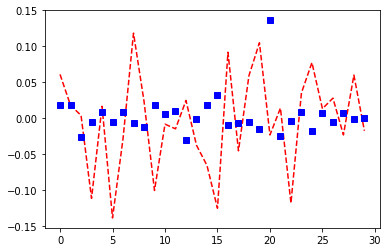

In [265]:
#test on test set
preds = model.forward(Variable(comments_test.float()), Variable(score_test.float()))
test_loss = loss = mse_loss(Variable(prices_test.float()), preds)
print(test_loss)

t = np.arange(0, 30, 1)

preds_np = preds.data.numpy()
prices_numpy = prices_test.numpy()
score_numpy = score_test.numpy()
# red dashes, blue squares and green triangles
plt.plot(t, prices_numpy, 'r--', t, preds_np, 'bs')
plt.show()